# Emotion Classifier with Deep Learning 🚀

## Index 📖
1. [Introduction](#1-introduction)
2. [Dataset Overview](#2-dataset-overview)
3. [Data Preprocessing](#3-data-preprocessing)
    1. [Loading the Dataset](#31-loading-the-dataset)
    2. [Data Cleaning and Label Encoding](#32-data-cleaning-and-label-encoding)
    3. [Train-Test Split](#33-train-test-split)
4. [Tokenization and Padding](#4-tokenization-and-padding)
5. [Model Architecture](#5-model-architecture)
6. [Model Training](#6-model-training)
7. [Model Evaluation](#7-model-evaluation)
8. [Visualizations](#8-visualizations)
    1. [Training History](#81-training-history)
    2. [Confusion Matrix](#82-confusion-matrix)
9. [Actual vs. Predicted Examples](#9-actual-vs-predicted-examples)
10. [Conclusion](#10-conclusion)

## 1. Introduction 🚀
Welcome to the Emotion Classifier journey! Our mission? Unleash the power of NLP and deep learning to decode emotions from text.

## 2. Dataset Overview 📊
Our dataset, named "Emotion_classify_Data.csv," is a treasure trove of emotions—anger, joy, and fear—spread across 5937 entries.

## 3. Data Preprocessing 🧹
### 3.1. Loading the Dataset
Let’s open the treasure chest and explore the dataset structure.

### 3.2. Data Cleaning and Label Encoding
Transforming text into numbers—our magical preprocessing step.

### 3.3. Train-Test Split
Balance is key! We split the dataset into realms of training and testing.

## 4. Tokenization and Padding 📝
Turning text into sequences and ensuring a uniform length for our magical machine.

## 5. Model Architecture 🏰
Our emotion classification castle: an embedding layer, an LSTM tower, and a dense layer with softmax magic.

## 6. Model Training 🚂
Witness the model’s evolution over 10 enchanting epochs.

## 7. Model Evaluation 🌟
The grand reveal! Classification metrics paint a vivid picture of our model’s emotional insight.

## 8. Visualizations 📈
### 8.1. Training History
A visual symphony of accuracy and validation accuracy dancing over epochs.

### 8.2. Confusion Matrix
A heatmap spectacle revealing the model’s performance in vivid colors.

## 9. Actual vs. Predicted Examples 🎭
The stage is set! Ten examples showcasing the model’s prowess in predicting emotions.

## 10. Conclusion 🌟
In this magical journey, we’ve crafted a robust solution for emotion classification. The model, a beacon of performance, awaits those delving into the enchanting world of NLP.



In [1]:
#Import necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, confusion_matrix

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the dataset
data = pd.read_csv('/kaggle/input/emotion-dataset/Emotion_classify_Data.csv')

In [3]:
#Exploring the dataset:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [4]:
data.head(7)

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
5,i feel jealous becasue i wanted that kind of l...,anger
6,when a friend of mine keeps telling me morbid ...,anger


In [5]:
data.tail(7)

,Comment,Emotion
5930,i think we often feel this way about planting ...,fear
5931,i have lost touch with the things that i feel ...,joy
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear
5936,i just wanted to apologize to you because i fe...,anger


In [6]:
data['Emotion'].value_counts()

Emotion
anger    2000
joy      2000
fear     1937
Name: count, dtype: int64

In [7]:
#Data Preprocessing:
X = data['Comment']
y = data['Emotion']

In [8]:
#Converting labels to numerical format:
le = LabelEncoder()
y = le.fit_transform(y)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [9]:
#Split the dataset into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#Tokensize and pad teh sequences:
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len)
X_text_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len)

In [11]:
#Build the deep learning model:
model = keras.Sequential([
    keras.layers.Embedding(input_dim=max_words, output_dim=16, input_length=max_len),
    keras.layers.LSTM(64, dropout=0.1, recurrent_dropout=0.1),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 lstm (LSTM)                 (None, 64)                20736     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 180931 (706.76 KB)
Trainable params: 180931 (706.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
#Training the model:
history = model.fit(X_train_seq, y_train, epochs=10, validation_data=(X_text_seq, y_test), batch_size=32)

Epoch 1/10
149/149 [==============================] - 76s 463ms/step - loss: 1.0803 - accuracy: 0.4241 - val_loss: 1.0083 - val_accuracy: 0.6010
Epoch 2/10
149/149 [==============================] - 57s 382ms/step - loss: 0.6454 - accuracy: 0.7793 - val_loss: 0.4559 - val_accuracy: 0.8502
Epoch 3/10
149/149 [==============================] - 55s 368ms/step - loss: 0.3583 - accuracy: 0.8787 - val_loss: 0.5454 - val_accuracy: 0.7862
Epoch 4/10
149/149 [==============================] - 53s 355ms/step - loss: 0.1237 - accuracy: 0.9674 - val_loss: 0.3217 - val_accuracy: 0.8855
Epoch 5/10
149/149 [==============================] - 52s 346ms/step - loss: 0.0618 - accuracy: 0.9853 - val_loss: 0.2962 - val_accuracy: 0.9049
Epoch 6/10
149/149 [==============================] - 52s 349ms/step - loss: 0.0472 - accuracy: 0.9891 - val_loss: 0.2889 - val_accuracy: 0.9057
Epoch 7/10
149/149 [==============================] - 51s 344ms/step - loss: 0.0286 - accuracy: 0.9943 - val_loss: 0.2875 - val_ac

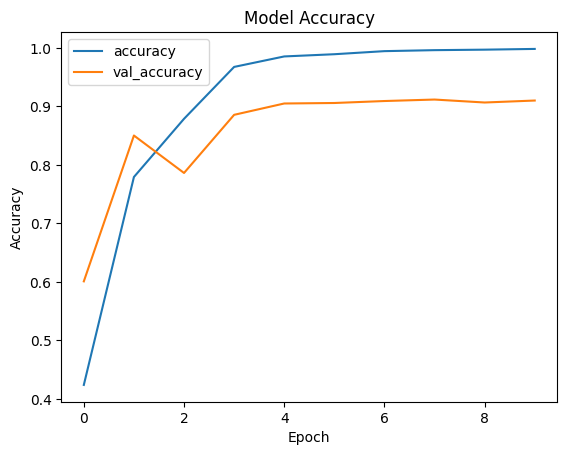

In [13]:
#Visualize training history:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [14]:
# Evaluate the model
y_pred_prob = model.predict(X_text_seq)
y_pred = np.argmax(y_pred_prob, axis=1)

print(classification_report(y_test, y_pred))


38/38 [==============================] - 1s 25ms/step
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       392
           1       0.89      0.94      0.91       416
           2       0.96      0.84      0.90       380

    accuracy                           0.91      1188
   macro avg       0.91      0.91      0.91      1188
weighted avg       0.91      0.91      0.91      1188



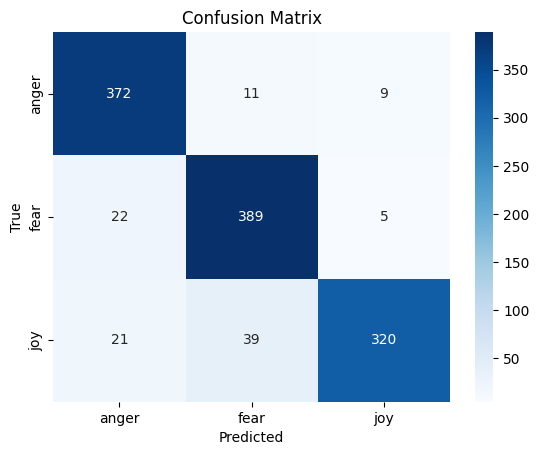

In [15]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [16]:
# Display actual vs predicted emotions
for i in range(10):  # Display the first 10 examples
    actual_emotion = le.classes_[y_test[i]]
    predicted_emotion = le.classes_[y_pred[i]]
    text = X_test.iloc[i]
    
    print(f"Example {i+1}:\n"
          f"Actual Emotion: {actual_emotion}\n"
          f"Predicted Emotion: {predicted_emotion}\n"
          f"Text: {text}\n"
          f"{'='*50}\n")


Example 1:
Actual Emotion: anger
Predicted Emotion: anger
Text: i do give up at times when i feel there s no point in a friendship when one cant be bothered

Example 2:
Actual Emotion: joy
Predicted Emotion: joy
Text: im a firm believer that nothing makes a woman feel much more terrific than a great trip to the salon to lift her spirits a bit

Example 3:
Actual Emotion: fear
Predicted Emotion: fear
Text: i was feeling very vulnerable and down no one really close to me has ever died before i either hadnt known them very well or was too young to remember

Example 4:
Actual Emotion: anger
Predicted Emotion: anger
Text: i closed her eyes in anger and feeling disgusted by this touch

Example 5:
Actual Emotion: anger
Predicted Emotion: anger
Text: i feel like being distracted

Example 6:
Actual Emotion: fear
Predicted Emotion: fear
Text: i just feel shy because i was just a sharia stream student who is now still struggling with european union policy and decision making thesis while those unc

In [17]:
# Save the model
model.save('emotion_classification_model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
